In [3]:
import pandas as pd
import numpy as np
import ast
import re

# Load the gyroscope dataset (update the path as needed)
df = pd.read_csv("accelerometer_labeled.csv")

# List of gyroscope columns to update
gyro_columns = ["x-acc", "y-acc", "z-acc"]

def compute_list_mean(cell):
    """
    Convert a string representation of a list to an actual list,
    then convert each element to float and compute the mean.
    If the cell represents an empty list or conversion fails, return np.nan.
    """
    # If the cell is missing, return NaN
    if pd.isnull(cell):
        return np.nan
    
    # If the cell is a string, remove whitespace and check if it equals "[]"
    if isinstance(cell, str):
        if re.sub(r"\s+", "", cell) == "[]":
            return np.nan

    try:
        # Convert the cell (if string) to an actual list
        lst = ast.literal_eval(cell)
    except Exception:
        return np.nan

    # If the list is empty, return NaN
    if not lst:
        return np.nan

    try:
        # Convert each element in the list to a float
        float_lst = [float(x) for x in lst]
    except Exception:
        return np.nan

    return np.mean(float_lst)

# Process each gyroscope column and update the original column
for col in gyro_columns:
    # Compute the mean for each row in the column
    computed_means = df[col].apply(compute_list_mean)
    
    # Compute the overall mean from the computed values (ignoring NaNs)
    overall_mean = computed_means.mean()
    
    # Replace any NaN (from empty lists or conversion errors) with the overall mean
    computed_means.fillna(overall_mean, inplace=True)
    
    # Update the original column with the computed means
    df[col] = computed_means

# Save the updated dataset to a new CSV file
output_path = "accelerometer_data_cleaned.csv"
df.to_csv(output_path, index=False)

print("Accelerometer dataset cleaned successfully. Blank list values have been replaced with the computed mean values.")

Accelerometer dataset cleaned successfully. Blank list values have been replaced with the computed mean values.


In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import sklearn.metrics as sm
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv("accelerometer_data_cleaned.csv")
df

,x-acc,y-acc,z-acc,label
0,-2.308986,-9.460555,-0.288943,1
1,2.424536,-2.739367,-6.373442,1
2,-0.380913,-0.054764,-0.016772,1
3,-0.005818,0.072634,0.157605,1
4,-2.854006,-8.689155,-1.810860,1
...,...,...,...,...
245,-2.247550,-0.836797,0.867897,3
246,-0.041364,0.060388,-0.097665,3
247,0.008721,0.016752,-0.023067,3
248,-0.828775,-9.893715,-0.773312,3


In [6]:
print(df.shape)
df.info()

(250, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x-acc   250 non-null    float64
 1   y-acc   250 non-null    float64
 2   z-acc   250 non-null    float64
 3   label   250 non-null    int64  
dtypes: float64(3), int64(1)
memory usage: 7.9 KB


In [7]:
df.describe()

,x-acc,y-acc,z-acc,label
count,250.000000,250.000000,250.000000,250.000000
mean,-0.424594,-3.767885,-0.613298,2.156000
std,2.963641,4.480126,2.376887,0.875632
min,-9.521290,-10.365651,-9.202413,1.000000
25%,-1.367879,-8.646570,-1.437912,1.000000
50%,-0.060226,-2.708641,-0.143715,2.000000
75%,0.403943,0.032343,0.147200,3.000000
max,9.238186,5.872362,9.855021,3.000000


In [8]:
X = df[['x-acc', 'y-acc','z-acc']].values

In [9]:
y =df[["label"]].values

In [10]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=0)

In [11]:
svc = SVC()
svc.fit(X_train, y_train)
y2_pred = svc.predict(X_test)
print("Classification Report:\n",classification_report(y_test, y2_pred))

Classification Report:
               precision    recall  f1-score   support

           1       0.00      0.00      0.00        16
           2       0.00      0.00      0.00        15
           3       0.38      1.00      0.55        19

    accuracy                           0.38        50
   macro avg       0.13      0.33      0.18        50
weighted avg       0.14      0.38      0.21        50



C:\Users\91977\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\91977\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\91977\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\91977\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarni

In [12]:
accuracy_score(y2_pred,y_test, normalize=True)

0.38

<Axes: >

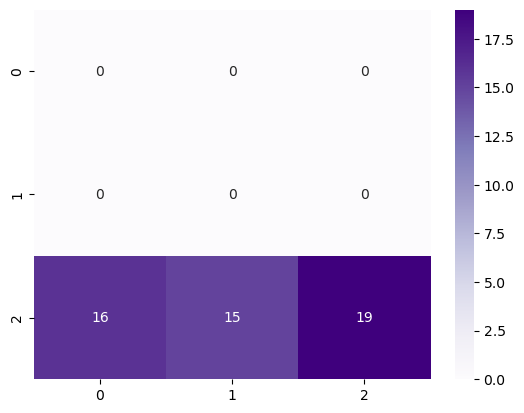

In [13]:
import seaborn as sns
con=sm.confusion_matrix(y2_pred,y_test)
sns.heatmap(con,annot=True,cmap='Purples')

In [14]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
y3_pred = dtc.predict(X_test)
print("Classification Report:\n",classification_report(y_test, y3_pred))

Classification Report:
               precision    recall  f1-score   support

           1       0.32      0.44      0.37        16
           2       0.43      0.20      0.27        15
           3       0.38      0.42      0.40        19

    accuracy                           0.36        50
   macro avg       0.38      0.35      0.35        50
weighted avg       0.38      0.36      0.35        50



In [15]:
accuracy_score(y3_pred,y_test, normalize=True)

0.36

<Axes: >

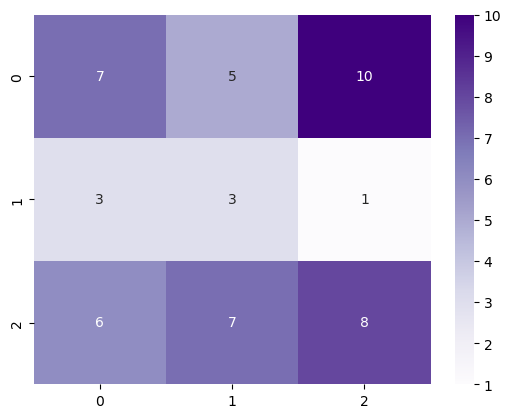

In [16]:
con=sm.confusion_matrix(y3_pred,y_test)
sns.heatmap(con,annot=True,cmap='Purples')

In [17]:
import time
start_rfc = time.time()
rfc = RandomForestClassifier(random_state=0, n_jobs=-1, max_depth=5, n_estimators=100, oob_score=True)
rfc.fit(X_train, y_train)
end_rfc = time.time()
final_rfc = end_rfc - start_rfc
final_rfc = round(final_rfc,3)
y4_pred = rfc.predict(X_test)

C:\Users\91977\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [18]:
print("Computation time                    : {}Sec".format(final_rfc))
print("Classification Report:\n",classification_report(y_test, y4_pred))

Computation time                    : 0.512Sec
Classification Report:
               precision    recall  f1-score   support

           1       1.00      0.12      0.22        16
           2       0.00      0.00      0.00        15
           3       0.40      1.00      0.57        19

    accuracy                           0.42        50
   macro avg       0.47      0.38      0.26        50
weighted avg       0.47      0.42      0.29        50



C:\Users\91977\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\91977\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\91977\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [20]:
accuracy_score(y4_pred,y_test, normalize=True)

0.42

<Axes: >

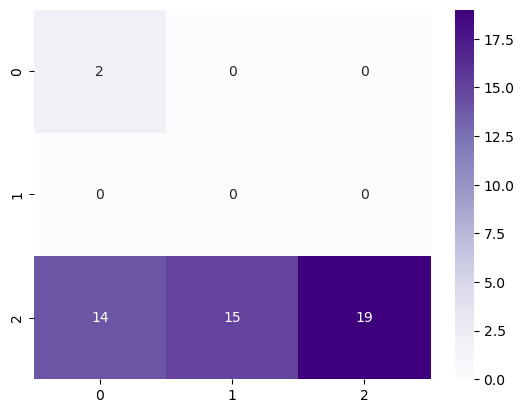

In [21]:
con=sm.confusion_matrix(y4_pred,y_test)
sns.heatmap(con,annot=True,cmap='Purples')

In [22]:
nbmod=GaussianNB()
nbmod.fit(X_train,y_train)
y5_pred = nbmod.predict(X_test)
print("Classification Report:\n",classification_report(y_test, y5_pred))

Classification Report:
               precision    recall  f1-score   support

           1       0.00      0.00      0.00        16
           2       0.00      0.00      0.00        15
           3       0.38      1.00      0.55        19

    accuracy                           0.38        50
   macro avg       0.13      0.33      0.18        50
weighted avg       0.14      0.38      0.21        50



C:\Users\91977\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\91977\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\91977\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\91977\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarni

In [23]:
accuracy_score(y5_pred,y_test, normalize=True)

0.38

<Axes: >

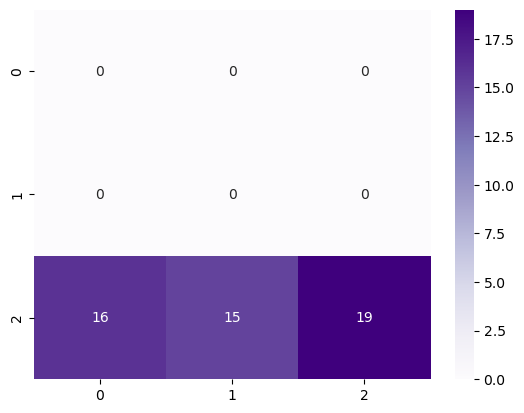

In [24]:
con=sm.confusion_matrix(y5_pred,y_test)
sns.heatmap(con,annot=True,cmap='Purples')

In [25]:
knn = KNeighborsClassifier(n_neighbors = 3, metric = 'minkowski', p = 2)
knn.fit(X_train, y_train)
y6_pred = knn.predict(X_test)
print("Classification Report:\n",classification_report(y_test, y6_pred))

Classification Report:
               precision    recall  f1-score   support

           1       0.26      0.31      0.29        16
           2       0.33      0.07      0.11        15
           3       0.32      0.47      0.38        19

    accuracy                           0.30        50
   macro avg       0.31      0.28      0.26        50
weighted avg       0.31      0.30      0.27        50



C:\Users\91977\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [26]:

accuracy_score(y6_pred,y_test, normalize=True)

0.3

<Axes: >

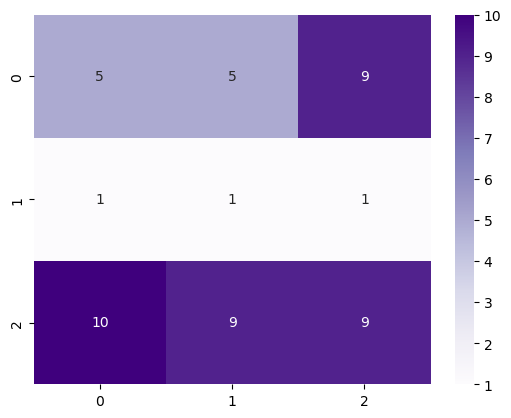

In [27]:
con=sm.confusion_matrix(y6_pred,y_test)
sns.heatmap(con,annot=True,cmap='Purples')